# Business Analysis for Yandex.Afisha project

In this project I have visit logs, order logs and marketing expenses for the period of 1.6.2017 - 31.5.2018. Using the data they contain, I am going to analyze users behavior, visits and orders patterns for different categories of users and to calculate different metrics, as described below.<br><br>

The main goal of the project is to analyze this data and to draw conclusions about marketing investments: what investments, when and in which user group give better result than other, on what the marketing team should concentrate and what needs further improvement. By the end of the project I will summarize the results and provide my recommendations.<br><br>

**The table of contents**:

1. **[Step 1](#Step-1.-Download-the-data-and-prepare-it-for-analysis).  
    Download the data and prepare it for analysis**.<br>
    In this step I downloaded the data, optimized it and checked for possible irregularities.
    
    
2. **[Step 2](#Step-2.-Make-reports-and-calculate-metrics). 
    Reports and metrics**.<br>
    
       Product:
    * [Amount of users per period](#How-many-people-use-it-every-day,-week,-and-month?)
    * [Daily sessions](#How-many-sessions-are-there-per-day?-(One-user-might-have-more-than-one-session.))
    * [Session lengths](#What-is-the-length-of-each-session?)
    * [Retention rate](#How-often-do-users-come-back?)<br>
    
    Sales:
    * [Conversion](#When-do-people-start-buying?)
    * [Orders per period](#How-many-orders-do-they-make-during-a-given-period-of-time?)
    * [Average purchase size](#What-is-the-average-purchase-size?)
    * [Lifetime Value (LTV)](#How-much-money-do-they-bring?-(LTV))<br>
    
    Marketing:
    * [Costs split](#How-much-money-was-spent?-Overall/per-source/over-time)
    * [Customer acquisition costs (CAC)](#How-much-did-customer-acquisition-from-each-of-the-sources-cost?)
    * [Return of costs (ROMI)](#How-worthwhile-were-the-investments?-(ROI)
    
    
3. **[Step 3](#Step-3.-Write-a-conclusion:-advise-marketing-experts-how-much-money-to-invest-and-where.) 
    Conclusion**.

In [1]:
# libraries cell
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

# Step 1. Download the data and prepare it for analysis

In [2]:
# load samples

try: # local files
    visits_demo = pd.read_csv('datasets/visits_log_us.csv', nrows = 500)
    orders_demo = pd.read_csv('datasets/orders_log_us.csv', nrows = 500)
    costs_demo = pd.read_csv('datasets/costs_us.csv', nrows = 500)
except: # global files
    visits_demo = pd.read_csv('/datasets/visits_log_us.csv', nrows = 500)
    orders_demo = pd.read_csv('/datasets/orders_log_us.csv', nrows = 500)
    costs_demo = pd.read_csv('/datasets/costs_us.csv', nrows = 500)

# check samples's sizes and data types
print(visits_demo.info(memory_usage = 'deep'))
print()
print(orders_demo.info(memory_usage = 'deep'))
print()
print(costs_demo.info(memory_usage = 'deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sou

In [3]:
# check if the column can be converted to category type:
visits_demo['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

In [4]:
# convert device column to category:
visits_demo['Device'] = visits_demo['Device'].astype('category')

# convert date and time columns to datetime format:
visits_demo['End Ts'] = pd.to_datetime(visits_demo['End Ts'], format = '%Y-%m-%d %H:%M:%S')
visits_demo['Start Ts'] = pd.to_datetime(visits_demo['Start Ts'], format = '%Y-%m-%d %H:%M:%S')
orders_demo['Buy Ts'] = pd.to_datetime(orders_demo['Buy Ts'], format = '%Y-%m-%d %H:%M:%S')
costs_demo['dt'] = pd.to_datetime(costs_demo['dt'], format = '%Y-%m-%d')

In [5]:
# check the sizes of the updated samples:

print(visits_demo.info(memory_usage = 'deep'))
print()
print(orders_demo.info(memory_usage = 'deep'))
print()
print(costs_demo.info(memory_usage = 'deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    category      
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.5 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   500 non-null    datetime64[ns]
 1   Revenue  500 non-null    float64       
 2   Uid      500 non-null    uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 11.8 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
D

In [6]:
# load full datasets:

try: # local files
    visits = pd.read_csv('datasets/visits_log_us.csv', dtype = {'Device':'category'}, parse_dates = ['End Ts', 'Start Ts'])
    orders = pd.read_csv('datasets/orders_log_us.csv', parse_dates = ['Buy Ts'])
    costs = pd.read_csv('datasets/costs_us.csv', parse_dates = ['dt'])
except: # global files
    visits = pd.read_csv('/datasets/visits_log_us.csv', dtype = {'Device':'category'}, parse_dates = ['End Ts', 'Start Ts'])
    orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates = ['Buy Ts'])
    costs = pd.read_csv('/datasets/costs_us.csv', parse_dates = ['dt'])

In [7]:
# check info on datasets
print(visits.info(memory_usage = 'deep'))
print()
print(orders.info(memory_usage = 'deep'))
print()
print(costs.info(memory_usage = 'deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 en

In [8]:
# rename columns:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']

In [9]:
# check duplicates
print('Number of duplicated rows in visits dataframe is:', visits.duplicated().sum())
print('Number of duplicated rows in orders dataframe is:', orders.duplicated().sum())
print('Number of duplicated rows in costs dataframe is:', costs.duplicated().sum())

Number of duplicated rows in visits dataframe is: 0
Number of duplicated rows in orders dataframe is: 0
Number of duplicated rows in costs dataframe is: 0


In [10]:
# describe the datasets to check for mistakes

visits.describe(datetime_is_numeric=True, include = 'all')

,device,end_ts,source_id,start_ts,uid
count,359400,359400,359400.000000,359400,3.594000e+05
unique,2,NaN,NaN,NaN,NaN
top,desktop,NaN,NaN,NaN,NaN
freq,262567,NaN,NaN,NaN,NaN
mean,NaN,2017-12-18 06:28:15.036205056,3.750515,2017-12-18 06:17:32.010517760,9.202557e+18
min,NaN,2017-06-01 00:02:00,1.000000,2017-06-01 00:01:00,1.186350e+13
25%,NaN,2017-10-15 09:45:45,3.000000,2017-10-15 09:41:00,4.613407e+18
50%,NaN,2017-12-18 18:59:30,4.000000,2017-12-18 18:46:00,9.227413e+18
75%,NaN,2018-02-28 10:08:15,5.000000,2018-02-28 09:54:00,1.372824e+19
max,NaN,2018-06-01 01:26:00,10.000000,2018-05-31 23:59:00,1.844668e+19


In [11]:
orders.describe(datetime_is_numeric=True)

,buy_ts,revenue,uid
count,50415,50415.000000,5.041500e+04
mean,2017-12-20 05:14:24.846176768,4.999647,9.098161e+18
min,2017-06-01 00:10:00,0.000000,3.135781e+14
25%,2017-10-13 17:28:00,1.220000,4.533567e+18
50%,2017-12-21 14:12:00,2.500000,9.102274e+18
75%,2018-03-02 16:10:00,4.890000,1.368290e+19
max,2018-06-01 00:02:00,2633.280000,1.844617e+19
std,NaN,21.818359,5.285742e+18


In [12]:
costs.describe(datetime_is_numeric=True)

,source_id,dt,costs
count,2542.000000,2542,2542.000000
mean,4.857199,2017-11-29 09:04:57.403619072,129.477427
min,1.000000,2017-06-01 00:00:00,0.540000
25%,2.000000,2017-08-30 00:00:00,21.945000
50%,4.000000,2017-11-29 00:00:00,77.295000
75%,9.000000,2018-02-28 00:00:00,170.065000
max,10.000000,2018-05-31 00:00:00,1788.280000
std,3.181581,NaN,156.296628


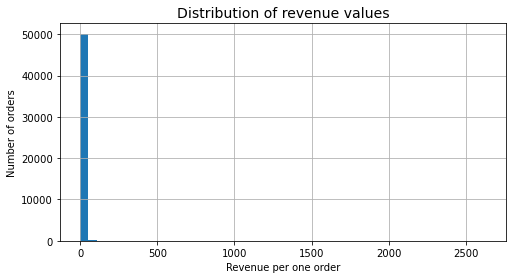

In [13]:
# check orders's revenue (which has some 0 and extremely high values)

orders.revenue.hist(bins = 50, figsize = (8,4))
plt.xlabel('Revenue per one order')
plt.ylabel('Number of orders')
plt.title('Distribution of revenue values', fontsize = 14)
plt.show()

In [14]:
# check what is the share of revenues with 0 values out of total set:

print('The share of 0 values in revenue column is {:.2%}'.format(len(orders.query('revenue == 0')) / len(orders)))

The share of 0 values in revenue column is 0.10%


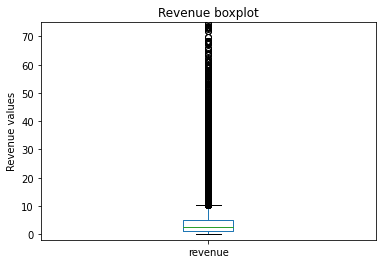

In [15]:
# check for typical values:

orders.revenue.plot(kind = 'box')
plt.ylabel('Revenue values')
plt.title('Revenue boxplot')
plt.ylim(-2,75)
plt.show()

In [16]:
#remove 0 values:

orders = orders.query('revenue > 0')

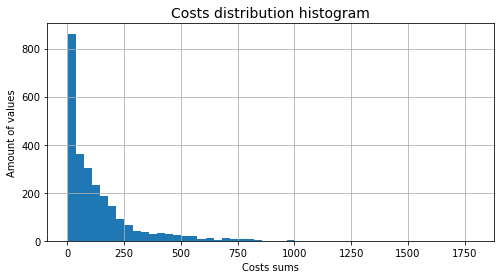

In [17]:
# check costs distribution histogram
costs.costs.hist(bins = 50, figsize = (8,4))
plt.xlabel('Costs sums')
plt.ylabel('Amount of values')
plt.title('Costs distribution histogram', fontsize = 14)
plt.show()

In [18]:
# convert numerical columns:
visits.source_id = visits.source_id.astype('int8')
orders.revenue = orders.revenue.astype('float32')
costs.costs = costs.costs.astype('float32')

#### <font color = 'blue'>Notes:</font>
In this step I pre-loaded 'demo' versions of datasets to take a look at data types, then converted data types while loading full datasets, replaced troublesome column names and converted numeric column types to optimize dataset's size further. <br>
The 'visits' start dates are all before 31.5.18, but there were sessions which ended a little after midnight in 1.6.18. Some of those sessions, according to last 'costs' timestamp, ended in purchases too. It doesn't look like mistake to me, so I will leave it as it is.<br>

I removed purchases with values of 0 (0.1% of the whole dataset), but after checking costs-vs-profits graphs in section 3 decided against removing high values, because they also add important insigths. Instead, I just will get averages with median and not mean.<br>
I decided not to deal with costs higher values too, because the distribution looks consistent, outliers are not too big and not placed too far. Using median instead of mean should also help with the averages here.


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


# Step 2. Make reports and calculate metrics
## 1. Product
### How many people use it every day, week, and month?


In [19]:
# create columns for date, week, month and year of visit
visits['visit_date'] = visits['start_ts'].dt.date
visits['visit_week']  = visits['start_ts'].astype('datetime64[W]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')


# look at the result:
visits.head()

,device,end_ts,source_id,start_ts,uid,visit_date,visit_week,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01


In [20]:
# calculate daily, weekly and monthly active users
dau = visits.groupby('visit_date').agg({'uid':'nunique'})
wau = visits.groupby('visit_week').agg({'uid':'nunique', 'visit_date':'nunique'}).query('visit_date >= 6').uid
mau = visits.groupby('visit_month').agg({'uid':'nunique'})

# check the averages:
print('The average number of daily active users (DAU) is', int(dau.mean()))
print('The average number of weekly active users (WAU) is', int(wau.mean()))
print('The average number of monthly active users (MAU) is', int(mau.mean()))

The average number of daily active users (DAU) is 907
The average number of weekly active users (WAU) is 5796
The average number of monthly active users (MAU) is 23228


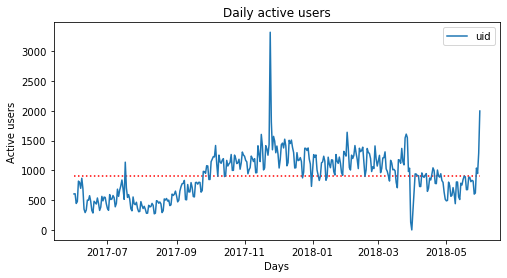

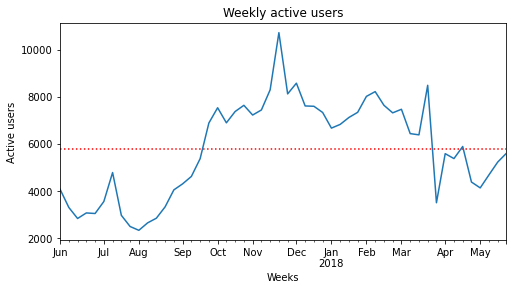

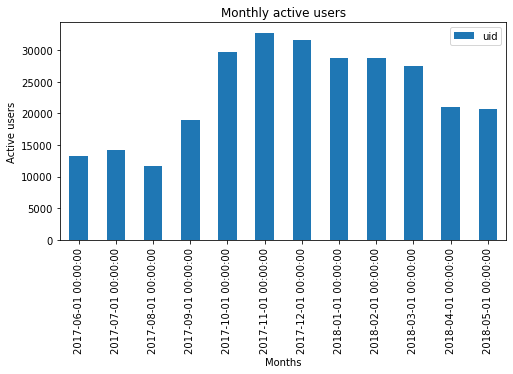

In [21]:
# plot line graphs to check dynamics of active users over time

dau.plot(figsize = (8,4))
plt.ylabel('Active users')
plt.xlabel('Days')
plt.title('Daily active users')
plt.hlines(int(dau.mean()), visits['visit_date'].min(), visits['visit_date'].max(), color='red', linestyle='dotted')
plt.show()

wau.plot(figsize = (8,4))
plt.ylabel('Active users')
plt.xlabel('Weeks')
plt.title('Weekly active users')
plt.hlines(int(wau.mean()), visits['visit_week'].min(), visits['visit_week'].max(), color='red', linestyle='dotted')

plt.show()

mau.plot(figsize = (8,4), kind = 'bar')
plt.ylabel('Active users')
plt.xlabel('Months')
plt.title('Monthly active users')
plt.hlines(int(mau.mean()), visits['visit_month'].min(), visits['visit_month'].max(), color='red', linestyle='dotted')
plt.show()

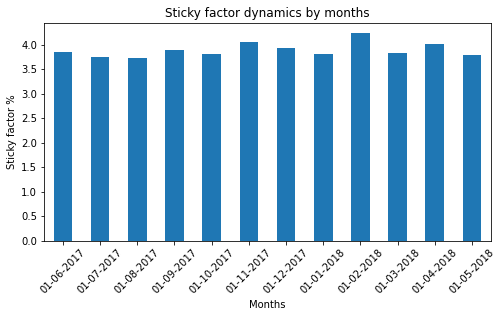

In [22]:
# calculate average monthly sticky factor

# get average monthly DAU:
avg_monthly_dau = dau.reset_index()
avg_monthly_dau['month'] = pd.to_datetime(avg_monthly_dau['visit_date']).astype('datetime64[M]')
avg_monthly_dau = avg_monthly_dau.groupby('month')['uid'].mean()

# merge together average monthly DAU and MAU:
sticky_factor = pd.concat([avg_monthly_dau, mau], axis = 1)
sticky_factor.columns = ['avg_dau', 'mau']

# get average monthly sticky factor in percents
sticky_factor['sticky_factor'] = (sticky_factor['avg_dau'] / sticky_factor['mau']) * 100


sticky_factor['sticky_factor'].plot(figsize = (8,4), kind = 'bar', rot = 45
                                   ).set_xticklabels(sticky_factor.index.strftime('%d-%m-%Y'))
plt.ylabel('Sticky factor %')
plt.xlabel('Months')
plt.title('Sticky factor dynamics by months')
plt.show()

#### <font color = 'blue'>Notes:</font>
MAU reflects how users activity affected by seasonality: summer months have lowest number of active users, while months that are preceding winter holidays (October, November and December) have the highest number of those.<br>
The number of active users peaked in november, most probably due to 'black friday' or other seasonal activities. Then it started to fall, with some peak spotted in most recent DAU number. Because DAU is more detail-sensitive and could detect changes day by day, it could reflect sudden rise in new users due to new marketing approach or other changes.<br>
Sticky factor dynamics doesn't looks to be informative enough. Looks like the fall in DAU and MAU was simultaneous, therefore rates didn't change.


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


### How many sessions are there per day? (One user might have more than one session.)

In [23]:
daily_sessions = visits.groupby('visit_date').agg({'uid':'count'})

print('Average number of daily sessions is', int(daily_sessions.mean()))
print('Ratio between average number of daily sessions and DAU is', round(float((int(daily_sessions.mean()) / dau.mean())), 2))

Average number of daily sessions is 987
Ratio between average number of daily sessions and DAU is 1.09


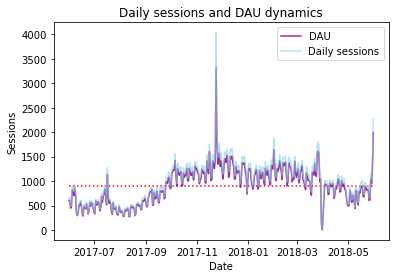

In [24]:
# look at number sessions per day dynamics compared to DAU
plt.plot(dau.index, dau, alpha = 0.8, label = 'DAU', color = 'purple')
plt.plot(daily_sessions.index, daily_sessions, alpha = 0.6, label = 'Daily sessions', color='skyblue')
plt.legend()
plt.ylabel('Sessions')
plt.xlabel('Date')
plt.title('Daily sessions and DAU dynamics')
plt.hlines(int(dau.mean()), visits['visit_date'].min(), visits['visit_date'].max(), color='red', linestyle='dotted')
plt.show()

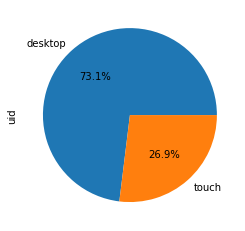

In [25]:
# daily sessions by device: 
daily_sessions_by_platform = visits.groupby('device').agg({'uid':'count'})
daily_sessions_by_platform.plot(kind = 'pie', subplots = 'True', autopct='%1.1f%%', legend = False)
plt.show()

#### <font color = 'blue'>Notes:</font>

Daily sessions number is very close to DAU, meaning that the vast majority of customers doesn't visit the service in the same day twice. <br>
It could be good - if they got what they need from the first visit and that the service is efficient, but it could also be bad if they got stuck and left before buying for some reason.<br>
Also most of the visits come from PC platforms, while as far as I know from different internet sources, mobile browsing is usually preferred by more than half users. It could be because of target user's preference, but also it could be because mobile versions (adapted site or app or both) need to be improved.


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


### What is the length of each session?

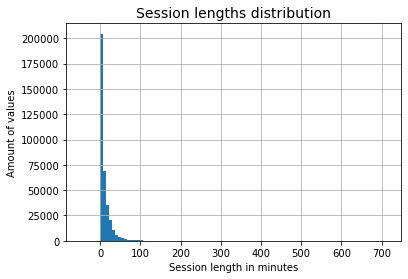

In [26]:
visits['session_length'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

visits.session_length.hist(bins = 100)
plt.xlabel('Session length in minutes')
plt.ylabel('Amount of values')
plt.title('Session lengths distribution', fontsize = 14)
plt.show()

In [27]:
visits.query('session_length < 0')

,device,end_ts,source_id,start_ts,uid,visit_date,visit_week,visit_month,session_length
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018-03-25,2018-03-22,2018-03-01,-32.0
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018-03-25,2018-03-22,2018-03-01,-46.0


In [28]:
print('Total share of visit lentghs with values 0 or lower: {:.2%}'.format(
    len(visits.query('session_length <= 0')) / len(visits)))

Total share of visit lentghs with values 0 or lower: 9.96%


In [29]:
visits.session_length.describe()

count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_length, dtype: float64

In [30]:
visits.session_length.mode()

0    1.0
dtype: float64

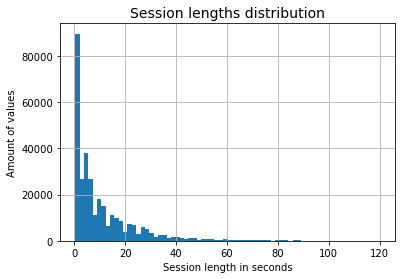

In [31]:
# remove rows with too short (0 or negative) and too long (above 2 hours) sessions:
visits = visits.query('0 < session_length <= 120')

# check the histogram again:
visits.session_length.hist(bins = 70)
plt.xlabel('Session length in seconds')
plt.ylabel('Amount of values')
plt.title('Session lengths distribution', fontsize = 14)
plt.show()

In [32]:
average_session_length = visits.groupby('visit_date').agg({'session_length':'median'})
print('Average daily session length is {} minutes'.format(int(average_session_length.median())))

Average daily session length is 6 minutes


In [33]:
average_session_length.describe()

,session_length
count,364.000000
mean,5.832418
std,0.712497
min,1.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


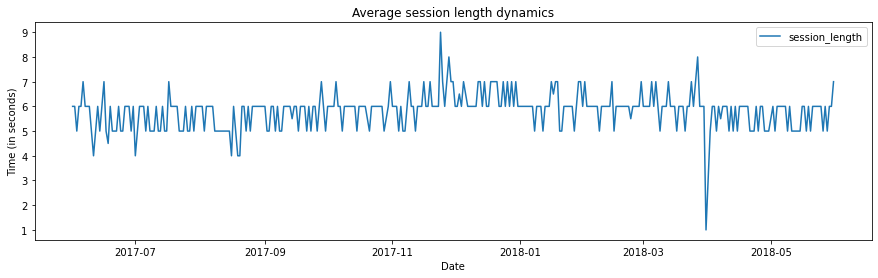

In [34]:
# average session dynamics over time
average_session_length.plot(figsize = (15,4))
plt.ylabel('Time (in seconds)')
plt.xlabel('Date')
plt.title('Average session length dynamics')
plt.show()

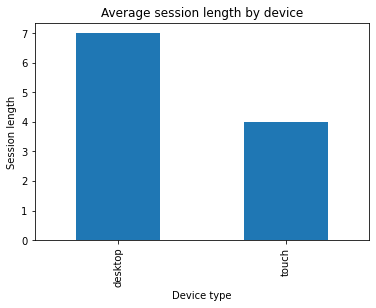

In [35]:
# average session length by platform
session_length_by_platform = visits.groupby('device').agg({'session_length':'median'})
session_length_by_platform.plot(kind = 'bar', legend = False)
plt.xlabel('Device type')
plt.ylabel('Session length')
plt.title('Average session length by device')
plt.show()

#### <font color = 'blue'>Notes:</font>

Average session's length is 6 minutes.<br>
Session length doesn't change much over time, except high peak in december 2017 (when also a peak in number of sessions presented), and except an unexplained fall in session durations around april 2018, which could be a result of some technical issues.<br>
Mobile device users spend less time in the service than average. It could also be an indication of a problem with mobile version of the service.


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


### How often do users come back?

In [36]:
# find first visit for each user:
first_activity_date = visits.groupby('uid')['start_ts'].min()
first_activity_date.name = 'first_activity_date'
user_activity = visits[['uid', 'start_ts', 'device', 'source_id']].join(first_activity_date, on = 'uid')

In [37]:
# add activity month and first activity month
user_activity['activity_month'] = user_activity['start_ts'].astype('datetime64[M]')
user_activity['first_activity_month'] = user_activity['first_activity_date'].astype('datetime64[M]')

In [38]:
# calculate cohort lifetime:
user_activity['cohort_lifetime'] = (
    (user_activity['activity_month'] - user_activity['first_activity_month']) / np.timedelta64(1, 'M')).round().astype('int')

user_activity.head()

,uid,start_ts,device,source_id,first_activity_date,activity_month,first_activity_month,cohort_lifetime
0,16879256277535980062,2017-12-20 17:20:00,touch,4,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,104060357244891740,2018-02-19 16:53:00,desktop,2,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
3,16174680259334210214,2018-05-20 10:59:00,desktop,9,2018-03-09 20:05:00,2018-05-01,2018-03-01,2
5,16007536194108375387,2017-09-03 21:35:00,desktop,5,2017-09-03 21:35:00,2017-09-01,2017-09-01,0
6,6661610529277171451,2018-01-30 11:13:00,desktop,1,2017-06-29 09:00:00,2018-01-01,2017-06-01,7


In [39]:
# create cohorts table
cohorts = user_activity.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns = {'uid': 'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on = 'first_activity_month')

# add the retention column:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,11880,11880,1.000000
1,2017-06-01,1,899,11880,0.075673
2,2017-06-01,2,606,11880,0.051010
3,2017-06-01,3,710,11880,0.059764
4,2017-06-01,4,777,11880,0.065404


In [40]:
cohorts_retention_pivot = cohorts.pivot_table(
    index = 'first_activity_month',
    columns = 'cohort_lifetime',
    values = 'retention',
    aggfunc = 'sum')

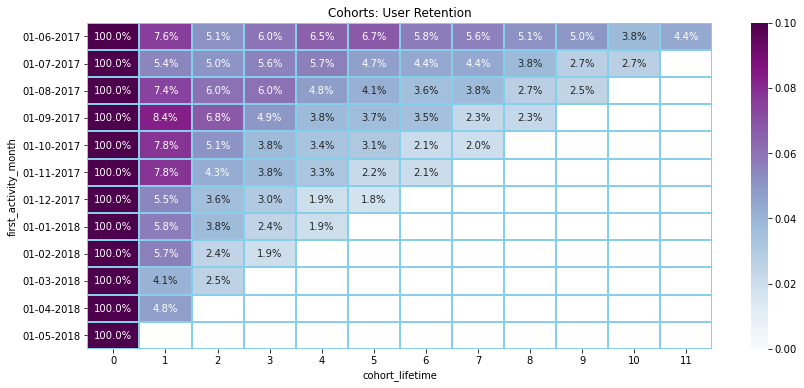

In [41]:
# plot a heatmap
plt.figure(figsize=(14, 6))
plt.title('Cohorts: User Retention')
sns.heatmap(
    cohorts_retention_pivot, 
    annot=True, 
    fmt='.1%', 
    linewidths=1, 
    linecolor='skyblue', 
    cmap = 'BuPu',
    vmin = 0, vmax = 0.1
).set_yticklabels(cohorts_retention_pivot.index.strftime('%d-%m-%Y'))
plt.show()

In [42]:
# extract first source id per user:
first_source_id = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id':'first'})
first_source_id = first_source_id.rename(columns = {'source_id' : 'first_source_id'})

user_activity = user_activity.merge(first_source_id, on = 'uid')

In [43]:
# create cohorts by source table
source_retention = user_activity.groupby(['first_source_id', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
initial_users_count = source_retention[source_retention['cohort_lifetime'] == 0][['first_source_id', 'uid']]
initial_users_count = initial_users_count.rename(columns = {'uid': 'source_users'})
source_retention = source_retention.merge(initial_users_count, on = 'first_source_id')

# add the retention column:
source_retention['retention'] = source_retention['uid'] / source_retention['source_users']

source_retention.head()

,first_source_id,cohort_lifetime,uid,source_users,retention
0,1,0,9299,9299,1.000000
1,1,1,912,9299,0.098075
2,1,2,526,9299,0.056565
3,1,3,397,9299,0.042693
4,1,4,322,9299,0.034627


In [44]:
source_retention_pivot = source_retention.pivot_table(
    index = 'first_source_id',
    columns = 'cohort_lifetime',
    values = 'retention',
    aggfunc = 'sum')

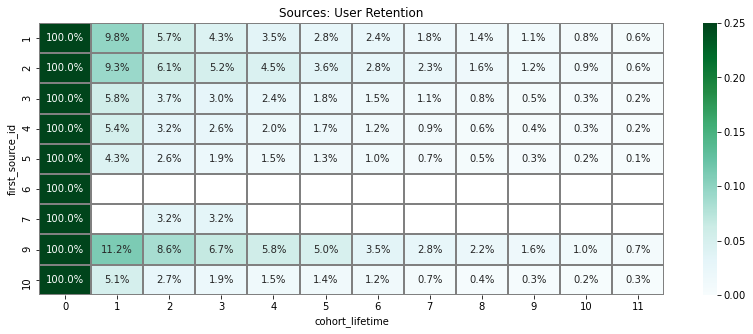

In [45]:
# plot a heatmap
plt.figure(figsize=(14, 5))
plt.title('Sources: User Retention')
sns.heatmap(
    source_retention_pivot, 
    annot=True, 
    fmt='.1%', 
    linewidths=1, 
    linecolor='gray', 
    cmap = 'BuGn',
    vmin = 0, vmax = 0.25
)
plt.show()

In [46]:
# extract first visit device for user:
first_device = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'device':'first'})
first_device = first_device.rename(columns = {'device' : 'first_device'})

# add it to user activity dataframe:
user_activity = user_activity.merge(first_device, on = 'uid')

In [47]:
# check retention by device:
device_retention = user_activity.groupby(['first_device', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
device_users_count = device_retention[device_retention['cohort_lifetime'] == 0][['first_device', 'uid']]
device_users_count = device_users_count.rename(columns = {'uid': 'device_users'})
device_retention = device_retention.merge(device_users_count, on = 'first_device')

# add the retention column:
device_retention['retention'] = device_retention['uid'] / device_retention['device_users']

device_retention.head()

,first_device,cohort_lifetime,uid,device_users,retention
0,desktop,0,147358,147358,1.000000
1,desktop,1,9014,147358,0.061171
2,desktop,2,5722,147358,0.038831
3,desktop,3,4641,147358,0.031495
4,desktop,4,3785,147358,0.025686


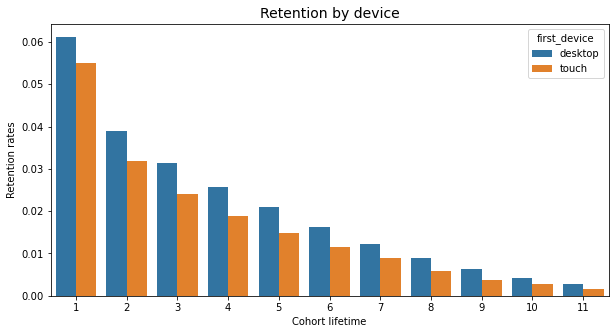

In [48]:
plt.figure(figsize = (10,5))
sns.barplot(data = device_retention.query('cohort_lifetime > 0'), x = 'cohort_lifetime', y = 'retention', hue = 'first_device')
plt.ylabel('Retention rates')
plt.xlabel('Cohort lifetime')
plt.title('Retention by device', fontsize = 14)
plt.show()

In [49]:
visits_by_source = (user_activity.first_source_id.value_counts() / len(user_activity)).reset_index()
visits_by_source.columns = ['first_source_id', 'visits_share']
visits_by_source

,first_source_id,visits_share
0,4,0.285376
1,3,0.274846
2,5,0.187438
3,2,0.117226
4,1,0.070922
5,9,0.034906
6,10,0.029170
7,7,0.000105
8,6,0.000012


#### <font color = 'blue'>Notes:</font>
In most cohorts retention tends to be significantly lower after period of time, except for the 6.17. <br>
In sources, best retention rate is for ids numbered 1, 2 and 9. Rates for sourced with id 6 and 7 are not representative, because their percentage in the overall dataset is insignificantly small.<br>
Retention by device is consistently lower for touch devices.


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


## Sales
### When do people start buying? 

In [50]:
# find first purchase date and store it in new dataframe
conversion = orders.groupby('uid').agg({'buy_ts':'first'}).reset_index()

# add first visit date, device and platform
conversion = conversion.join(first_activity_date, on = 'uid')

# add platform and device
conversion = conversion.merge(user_activity[['first_source_id', 'first_device', 'uid']], on = 'uid', how = 'left')

conversion['buy_ts'] = conversion['buy_ts'].dt.date
conversion['first_activity_date'] = conversion['first_activity_date'].dt.date

In [51]:
conversion['conversion_days'] = (conversion['buy_ts'] - conversion['first_activity_date']).dt.days

# check for negative values
len(conversion.query('conversion_days < 0'))

764

In [52]:
# replace negative conversion values with 0:
conversion.loc[conversion['conversion_days'] < 0, 'conversion_days'] = 0

len(conversion.query('conversion_days < 0'))

0

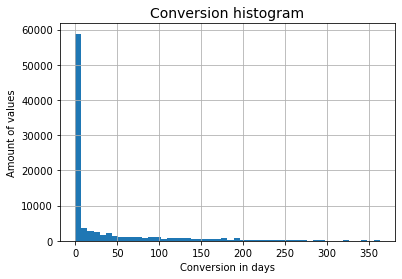

In [53]:
# check values histogram
conversion.conversion_days.hist(bins = 50)
plt.ylabel('Amount of values')
plt.xlabel('Conversion in days')
plt.title('Conversion histogram', fontsize = 14)
plt.show()

In [54]:
print('Average conversion time is {:.2f} days'.format(conversion.conversion_days.mean()))

Average conversion time is 32.35 days


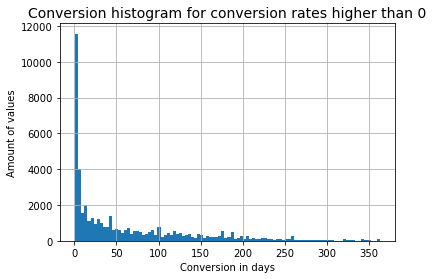

In [55]:
# look at conversion histogram not including converted on day 0:
conversion.query('conversion_days > 0').conversion_days.hist(bins = 100)
plt.ylabel('Amount of values')
plt.xlabel('Conversion in days')
plt.title('Conversion histogram for conversion rates higher than 0', fontsize = 14)
plt.show()

In [56]:
# check how many users have converted on day 0:
print('Total users converted on day 0 number is', len(conversion.query('conversion_days == 0')))
print('The share of users converted on day 0 is {:.2%}'.format(len(conversion.query('conversion_days == 0')) / len(conversion)))


Total users converted on day 0 number is 43829
The share of users converted on day 0 is 47.88%


In [57]:
# look at median conversion rates:

print('Average conversion time is {:.2f} days'.format(conversion.conversion_days.median()))
print()
print('Average conversion time by device:')
print(conversion.groupby('first_device').conversion_days.median())
print()
print('Average conversion time by source:')
print(conversion.groupby('first_source_id').conversion_days.median())

Average conversion time is 1.00 days

Average conversion time by device:
first_device
desktop    1.0
touch      1.0
Name: conversion_days, dtype: float64

Average conversion time by source:
first_source_id
1.0      1.0
2.0      4.0
3.0      1.0
4.0      0.0
5.0      0.0
7.0      0.0
9.0     15.0
10.0     0.0
Name: conversion_days, dtype: float64


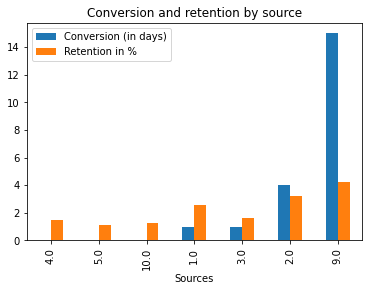

In [58]:
# compare conversion and retention on different sources
sources_compare = pd.concat([conversion.groupby('first_source_id').conversion_days.median(), 
                             #convert retention to %
                    round((source_retention.groupby('first_source_id').retention.median() * 100), 2)], axis = 1)


# exclude sources 6 and 7 because there are not enough data for those and plot a bar chart
sources_compare.query('index != 6 & index != 7').sort_values('conversion_days').plot(kind = 'bar')
plt.title('Conversion and retention by source')
plt.legend(['Conversion (in days)', 'Retention in %'])
plt.xlabel('Sources')
plt.show()

#### <font color = 'blue'>Notes:</font>
Vast majority of the buyers are making their first purchase very close to the first visit, though there are also some users who can make first purchase up to year after a first visit. <br>
Conversion is similar on both PC and touch devices.<br>
There are many users who are converted on the day of their first visits.<br>
Conversion for sources 4, 5, 10, 1 and 3 is short (0-1 days), for source 2 it's longer than average (4 days), and for source 9 it's very long (15 days).


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


### How many orders do they make during a given period of time?

In [59]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on = 'uid')

In [60]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

In [61]:
# add cohort lifetime
orders['age_month'] = ((orders['order_month'] - orders['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

orders.head()

,buy_ts,revenue,uid,first_order_date,order_month,first_order_month,age_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


In [62]:
# create cohorts table
cohort_orders = orders.groupby(['first_order_month', 'age_month']).agg({'uid': 'nunique', 'buy_ts':'count'}).reset_index()

# calculate amount of orders per buyer
cohort_orders['orders_per_buyer'] = cohort_orders['buy_ts'] / cohort_orders['uid']

cohort_orders.head()

,first_order_month,age_month,uid,buy_ts,orders_per_buyer
0,2017-06-01,0,2022,2353,1.163699
1,2017-06-01,1,61,177,2.901639
2,2017-06-01,2,50,171,3.420000
3,2017-06-01,3,54,224,4.148148
4,2017-06-01,4,87,291,3.344828


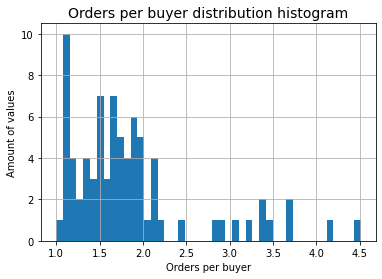

In [63]:
# check distribution
cohort_orders.orders_per_buyer.hist(bins = 45)
plt.xlabel('Orders per buyer')
plt.ylabel('Amount of values')
plt.title('Orders per buyer distribution histogram', fontsize = 14)
plt.show()

In [64]:
# show total average orders per buyer during period of one month:
round(cohort_orders.orders_per_buyer.median(), 2)

1.69

In [65]:
orders_per_month = cohort_orders.pivot_table(
    index = 'first_order_month',
    columns = 'age_month',
    values = 'orders_per_buyer',
    aggfunc = 'sum')

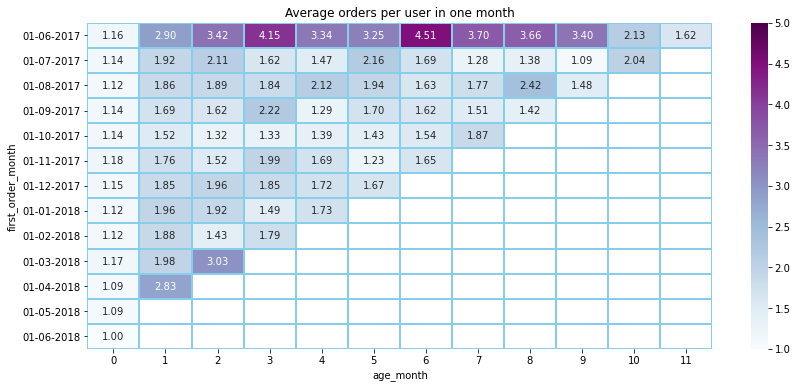

In [66]:
# plot a heatmap
plt.figure(figsize=(14, 6))
plt.title('Average orders per user in one month')
sns.heatmap(
    orders_per_month, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='skyblue', 
    cmap = 'BuPu',
    vmin = 1, vmax = 5
).set_yticklabels(orders_per_month.index.strftime('%d-%m-%Y'))
plt.show()

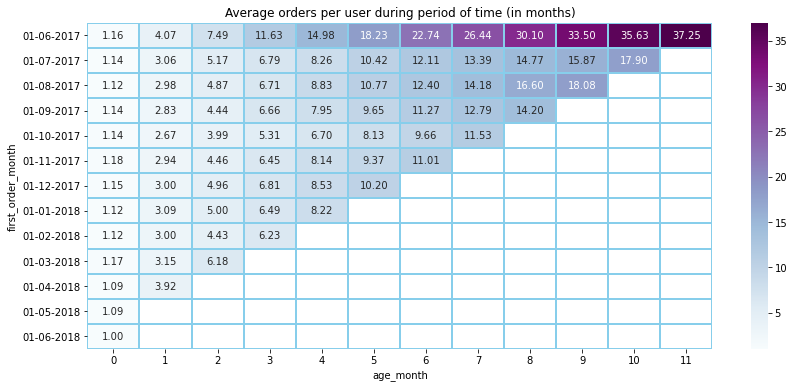

In [67]:
# plot a heatmap for cumulative values
plt.figure(figsize=(14, 6))
plt.title('Average orders per user during period of time (in months)')
sns.heatmap(
    orders_per_month.cumsum(axis = 1), 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='skyblue', 
    cmap = 'BuPu',
    vmin = 1, vmax = 37
).set_yticklabels(orders_per_month.index.strftime('%d-%m-%Y'))
plt.show()

In [68]:
# separate data for easier comparison by source and device
orders_split = orders[['buy_ts', 'uid', 'revenue', 'order_month', 'first_order_month']]

In [69]:
# merge sources and devices columns from user_activity table
orders_split = orders_split.merge(
    user_activity.groupby('uid').agg({'first_device':'first', 'first_source_id':'first'}).reset_index(), 
    on = 'uid', how = 'left')

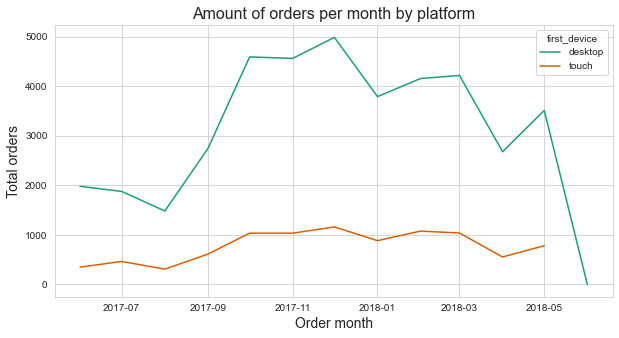

In [70]:
# number of orders by device
orders_device = orders_split.groupby(['first_device', 'order_month']).agg({'buy_ts':'count'}).reset_index()

sns.set_style("whitegrid")
plt.figure(figsize = (10,5))
sns.lineplot(data = orders_device, x = 'order_month', y = 'buy_ts', hue = 'first_device', palette = 'Dark2')
plt.title('Amount of orders per month by platform', fontsize = 16)
plt.ylabel('Total orders', fontsize = 14)
plt.xlabel('Order month', fontsize = 14)
plt.show()

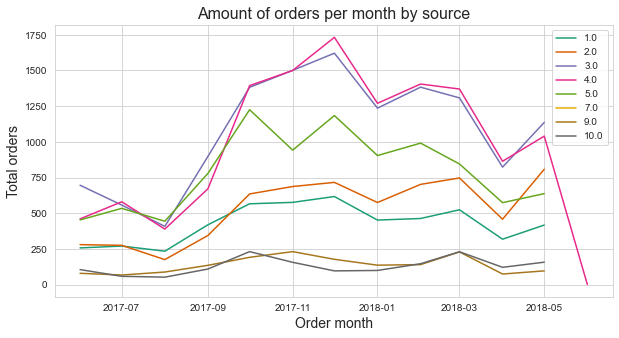

In [71]:
# number of orders by source
orders_source = orders_split.groupby(['first_source_id', 'order_month']).agg({'buy_ts':'count'}).reset_index()

sns.set_style("whitegrid")
plt.figure(figsize = (10,5))
sns.lineplot(data = orders_source, x = 'order_month', y = 'buy_ts', hue = 'first_source_id', palette = 'Dark2').legend(loc = 1)
plt.title('Amount of orders per month by source', fontsize = 16)
plt.ylabel('Total orders', fontsize = 14)
plt.xlabel('Order month', fontsize = 14)
plt.show()

In [72]:
# create sources table for easier comparison (I prefer to look at all the relevant numbers concentrated in one table):
sources = pd.concat([conversion.groupby('first_source_id').conversion_days.median(), 
                    source_retention.groupby('first_source_id').retention.median()], axis = 1).merge(
    orders_source.groupby('first_source_id').agg({'buy_ts':'mean'}), on = 'first_source_id', how = 'outer').merge(
    visits_by_source, on = 'first_source_id', how = 'outer')

sources = sources.rename(columns = {'buy_ts':'orders_per_month'})

In [73]:
# show sources sorted by average monthly orders
sources.sort_values('orders_per_month', ascending = False).round(2)

,first_source_id,conversion_days,retention,orders_per_month,visits_share
2,3.0,1.0,0.02,1079.08,0.27
3,4.0,0.0,0.01,975.08,0.29
4,5.0,0.0,0.01,792.67,0.19
1,2.0,4.0,0.03,533.50,0.12
0,1.0,1.0,0.03,426.08,0.07
7,9.0,15.0,0.04,136.92,0.03
8,10.0,0.0,0.01,130.00,0.03
6,7.0,0.0,0.03,1.00,0.00
5,6.0,NaN,1.00,NaN,0.00


#### <font color = 'blue'>Notes:</font>
Total average of monthly orders per user is 1.68.<br>
On the first month all cohorts make no more than 1 - 1.17 orders in average, which is relatively low.<br>
Earliest cohort has most active buyers, with up to 4.43 orders per month.<br>
10-12.2017 cohorts are the least active buyer.<br>
Most of orders made by desktop users. Mobile platform user's orders are very low and almost don't have seasonal activity peaks, which also could mean that mobile version and/or app needs improvement.<br>
Sources which brought the most active buyers are 2, 3 and 4.<br>
Most of the orders, sorted by any criteria, are made between 10.17 and 3.18, with highest peak at 12.17.


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


### What is the average purchase size?

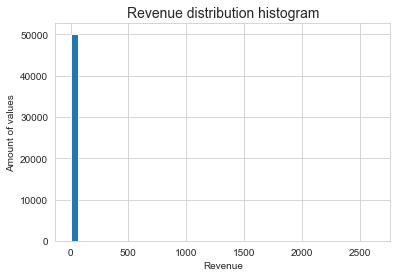

In [74]:
# check distribution to see if I need to choose mean or median aggfunc
orders.revenue.hist(bins = 40)
plt.xlabel('Revenue')
plt.ylabel('Amount of values')
plt.title('Revenue distribution histogram', fontsize = 14)
plt.show()

In [75]:
# overall average purchase sum:
orders.revenue.median()

2.5

In [76]:
# create cohorts table:
cohort_purchases = orders.dropna().pivot_table(
    index = 'first_order_month',
    columns = 'age_month',
    values = 'revenue',
    aggfunc = 'median')

cohort_purchases['average'] = cohort_purchases.median(axis = 1)

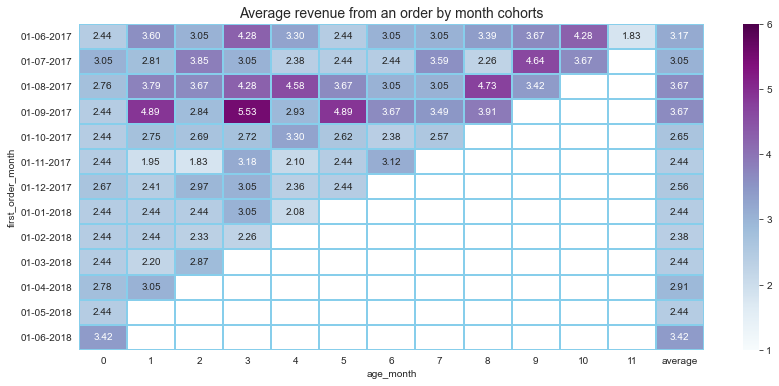

In [77]:
# plot a heatmap
plt.figure(figsize=(14, 6))
plt.title('Average revenue from an order by month cohorts', fontsize = 14)
sns.heatmap(
    cohort_purchases, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='skyblue', 
    cmap = 'BuPu',
    vmin = 1, vmax = 6
).set_yticklabels(orders_per_month.index.strftime('%d-%m-%Y'))
plt.show()

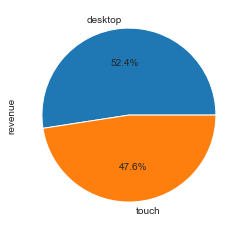

In [78]:
# average purchase by device
purchase_device = orders_split.groupby('first_device').agg({'revenue':'median'})
purchase_device.plot(kind = 'pie', subplots = 'True', autopct='%1.1f%%', legend = False)
plt.show()

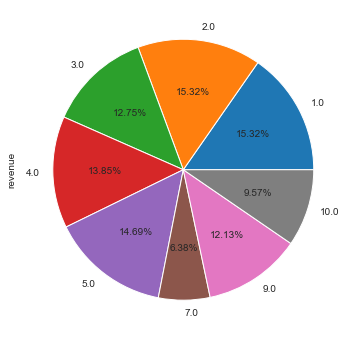

In [79]:
# average purchase by source
purchase_source = orders_split.groupby('first_source_id').agg({'revenue':'median'})
purchase_source.plot(kind = 'pie', subplots = 'True', autopct='%.2f%%', legend = False, figsize = (6,6))
plt.show()

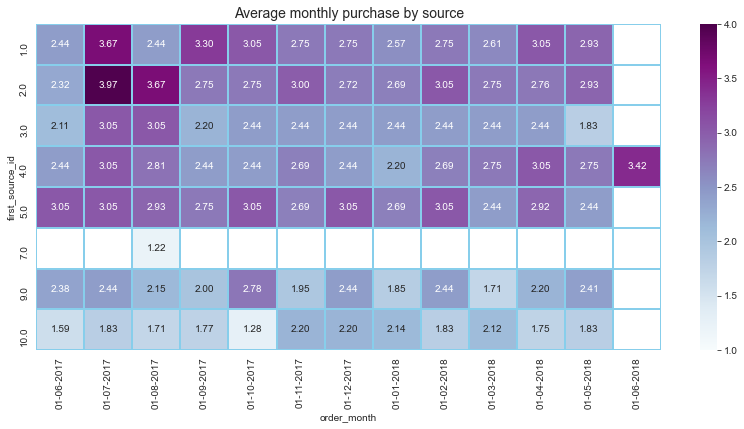

In [80]:
# average monthly purchase by source:
purchase_source_monthly = orders_split.pivot_table(
    index = 'first_source_id', 
    columns = 'order_month', 
    values = 'revenue', 
    aggfunc = 'median')

plt.figure(figsize=(14, 6))
plt.title('Average monthly purchase by source', fontsize = 14)
sns.heatmap(
    purchase_source_monthly, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='skyblue', 
    cmap = 'BuPu',
    vmin = 1, vmax = 4
).set_xticklabels(purchase_source_monthly.columns.strftime('%d-%m-%Y'))
plt.show()

In [81]:
sources = sources.merge(purchase_source, on = 'first_source_id', how = 'left')
sources = sources.rename(columns = {'revenue':'average_revenue'})
sources.sort_values('average_revenue', ascending = False)

,first_source_id,conversion_days,retention,orders_per_month,visits_share,average_revenue
0,1.0,1.0,0.025917,426.083333,0.070922,2.93
1,2.0,4.0,0.031991,533.500000,0.117226,2.93
4,5.0,0.0,0.011415,792.666667,0.187438,2.81
3,4.0,0.0,0.014460,975.076923,0.285376,2.65
2,3.0,1.0,0.016394,1079.083333,0.274846,2.44
7,9.0,15.0,0.042248,136.916667,0.034906,2.32
8,10.0,0.0,0.012756,130.000000,0.029170,1.83
6,7.0,0.0,0.032258,1.000000,0.000105,1.22
5,6.0,NaN,1.000000,NaN,0.000012,NaN


#### <font color = 'blue'>Notes:</font>
Average purchase size is 2.44.<br>
Largest purchases were made by cohorts 6-8.17, and by buyers from sources 1, 2 and 5.<br>
Purchase size on desktop is slightly larger than on touch devices, but the difference doesn't look too significant.<br>


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


### How much money do they bring? (LTV)

In [82]:
# add number of new buyers each month:
cohort_users = orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_users = cohort_users.rename(columns = {'uid':'cohort_users'})

In [83]:
# create cohorts
ltv_cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum', 'age_month':'mean'}).reset_index()
ltv_cohorts = ltv_cohorts.rename(columns = {'revenue':'gross_profit'})

# add total cohort users column
ltv_cohorts = ltv_cohorts.merge(cohort_users, on = 'first_order_month')

ltv_cohorts['ltv'] = ltv_cohorts['gross_profit'] / ltv_cohorts['cohort_users']

ltv_cohorts.head()

,first_order_month,order_month,gross_profit,age_month,cohort_users,ltv
0,2017-06-01,2017-06-01,9557.490234,0,2022,4.726751
1,2017-06-01,2017-07-01,981.820007,1,2022,0.485569
2,2017-06-01,2017-08-01,885.340027,2,2022,0.437854
3,2017-06-01,2017-09-01,1931.300049,3,2022,0.955143
4,2017-06-01,2017-10-01,2068.580078,4,2022,1.023037


In [84]:
ltv_cohorts_pivot = ltv_cohorts.pivot_table(
    index = 'first_order_month',
    columns = 'age_month',
    values = 'ltv',
    aggfunc = 'mean')

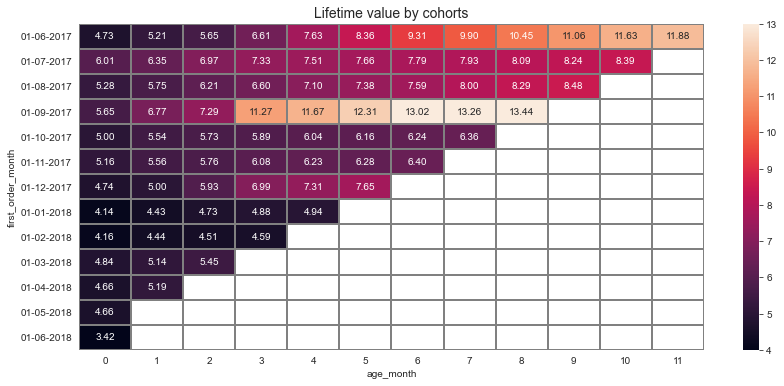

In [85]:
# plot a heatmap
plt.figure(figsize=(14, 6))
plt.title('Lifetime value by cohorts', fontsize = 14)
sns.heatmap(
    ltv_cohorts_pivot.cumsum(axis = 1), 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='grey', 
    #cmap = 'BuPu',
    vmin = 4, vmax = 13
).set_yticklabels(orders_per_month.index.strftime('%d-%m-%Y'))
plt.show()

In [86]:
# check ltv by source

ltv_sources = orders_split.groupby(['first_source_id', 'order_month']).agg({'revenue':'sum'}).reset_index()
ltv_sources = ltv_sources.rename(columns = {'revenue':'gross_profit'})


source_users = orders_split.groupby('first_source_id').agg({'uid':'nunique'})
source_users = source_users.rename(columns = {'uid':'source_users'})

ltv_sources = ltv_sources.merge(source_users, on = 'first_source_id')

ltv_sources['ltv'] = ltv_sources['gross_profit'] / ltv_sources['source_users']

ltv_sources.head()

,first_source_id,order_month,gross_profit,source_users,ltv
0,1.0,2017-06-01,1326.729980,2969,0.446861
1,1.0,2017-07-01,1613.180054,2969,0.543341
2,1.0,2017-08-01,1418.180054,2969,0.477663
3,1.0,2017-09-01,2869.189941,2969,0.966383
4,1.0,2017-10-01,3534.070068,2969,1.190323


In [87]:
ltv_sources_pivot = ltv_sources.pivot_table(
    index = 'first_source_id',
    columns = 'order_month',
    values = 'ltv',
    aggfunc = 'mean')

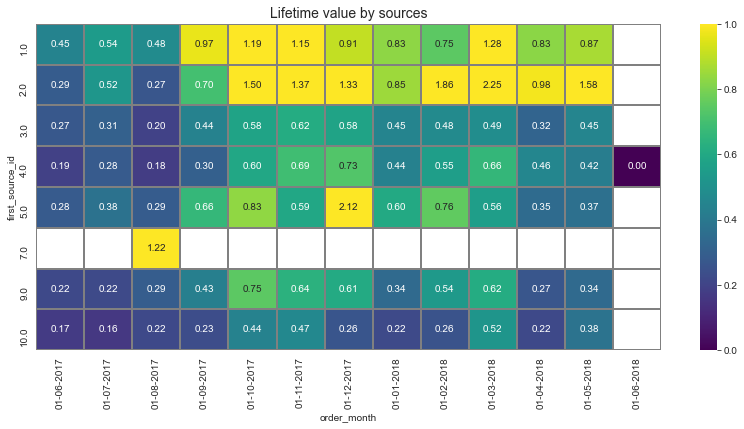

In [88]:
# plot a heatmap
plt.figure(figsize=(14, 6))
plt.title('Lifetime value by sources', fontsize = 14)
sns.heatmap(
    ltv_sources_pivot, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='grey', 
    cmap = 'viridis',
    vmin = 0, vmax = 1
).set_xticklabels(ltv_sources_pivot.columns.strftime('%d-%m-%Y'))
plt.show()

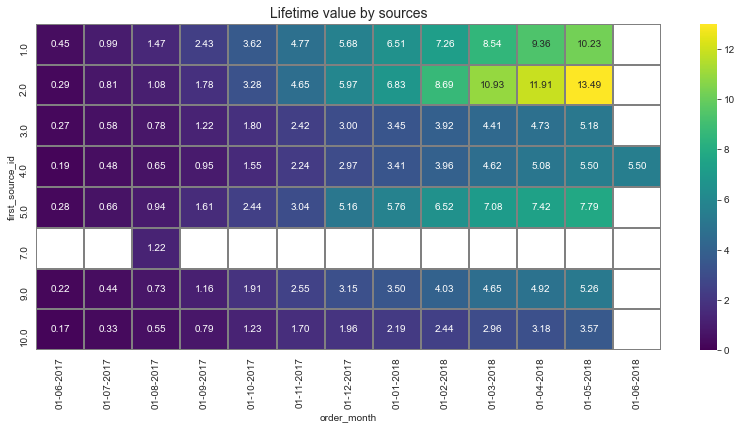

In [89]:
# plot a heatmap
plt.figure(figsize=(14, 6))
plt.title('Lifetime value by sources', fontsize = 14)
sns.heatmap(
    ltv_sources_pivot.cumsum(axis = 1), 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='grey', 
    cmap = 'viridis',
    vmin = 0, vmax = 13
).set_xticklabels(ltv_sources_pivot.columns.strftime('%d-%m-%Y'))
plt.show()

In [90]:
# update sources table with average ltv:
sources = sources.merge(ltv_sources.groupby('first_source_id').ltv.mean().reset_index(), on = 'first_source_id', how = 'left')
sources.sort_values(by = 'ltv', ascending = False)

,first_source_id,conversion_days,retention,orders_per_month,visits_share,average_revenue,ltv
6,7.0,0.0,0.032258,1.000000,0.000105,1.22,1.220000
1,2.0,4.0,0.031991,533.500000,0.117226,2.93,1.124266
0,1.0,1.0,0.025917,426.083333,0.070922,2.93,0.852763
4,5.0,0.0,0.011415,792.666667,0.187438,2.81,0.649314
7,9.0,15.0,0.042248,136.916667,0.034906,2.32,0.438477
2,3.0,1.0,0.016394,1079.083333,0.274846,2.44,0.431768
3,4.0,0.0,0.014460,975.076923,0.285376,2.65,0.422975
8,10.0,0.0,0.012756,130.000000,0.029170,1.83,0.297152
5,6.0,NaN,1.000000,NaN,0.000012,NaN,NaN


In [91]:
# find ltv by device:
ltv_devices = orders_split.groupby(['first_device', 'order_month']).agg({'revenue':'sum'}).reset_index()
ltv_devices = ltv_devices.rename(columns = {'revenue':'gross_profit'})

device_users = orders_split.groupby('first_device').agg({'uid':'nunique'})
device_users = device_users.rename(columns = {'uid':'device_users'})

ltv_devices = ltv_devices.merge(device_users, on = 'first_device')

ltv_devices['ltv'] = ltv_devices['gross_profit'] / ltv_devices['device_users']

ltv_devices_pivot = ltv_devices.pivot_table(
    index = 'order_month',
    columns = 'first_device',
    values = 'ltv',
    aggfunc = 'mean')

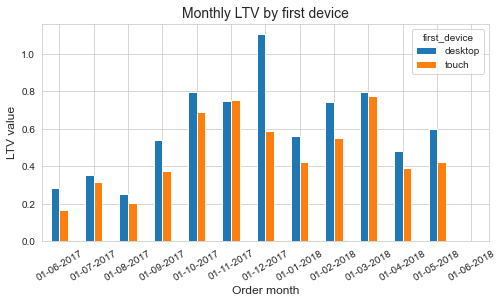

In [92]:
ltv_devices_pivot.plot(kind = 'bar', figsize = (8,4), rot = 30).set_xticklabels(ltv_devices_pivot.index.strftime('%d-%m-%Y'))
plt.xlabel('Order month', fontsize = 12)
plt.ylabel('LTV value', fontsize = 12)
plt.title('Monthly LTV by first device', fontsize = 14)
plt.show()

#### <font color = 'blue'>Notes:</font>
Highest LTV over time is spotted for the first cohort (6.17). Also there can be seen a connection to seasonality - during the winter holidays LTV rises for most of the cohorts.<br>
The sources with highest LTV are 1, 2 and 5.<br>
If we look at the devices, the LTV is slightly lower for touch devices at any given month.


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


## Marketing
### How much money was spent? Overall/per source/over time

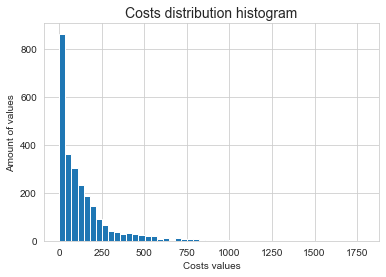

In [93]:
# check distribution
costs.costs.hist(bins = 50)
plt.xlabel('Costs values')
plt.ylabel('Amount of values')
plt.title('Costs distribution histogram', fontsize = 14)
plt.show()

In [94]:
# add month column to the costs table:
costs['month'] = costs.dt.astype('datetime64[M]')

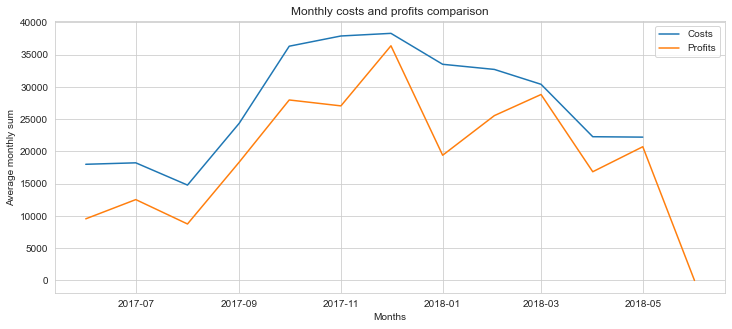

In [95]:
plt.figure(figsize = (12,5))
plt.plot(costs.groupby('month').agg({'costs':'sum'}).index, 
        costs.groupby('month').agg({'costs':'sum'}), 
         label = 'Costs')
plt.plot(orders.groupby('order_month').agg({'revenue': 'sum'}).index, 
        orders.groupby('order_month').agg({'revenue': 'sum'}), 
         label = 'Profits')
plt.ylabel('Average monthly sum')
plt.xlabel('Months')
plt.title('Monthly costs and profits comparison')
plt.legend()
plt.show()

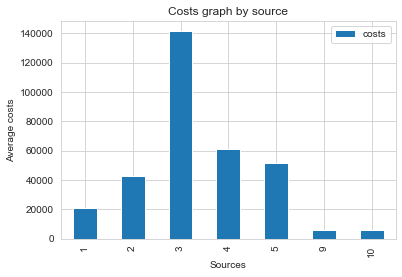

In [96]:
costs.groupby('source_id').agg({'costs':'sum'}).plot(kind = 'bar')
plt.ylabel('Average costs')
plt.xlabel('Sources')
plt.title('Costs graph by source')
plt.show()

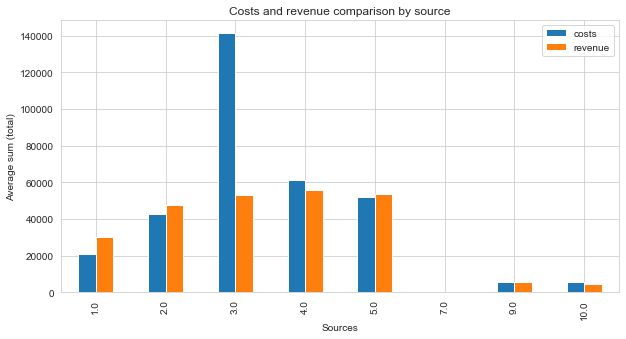

In [97]:
pd.concat([costs.groupby('source_id').agg({'costs':'sum'}), 
         orders_split.groupby('first_source_id').agg({'revenue':'sum'})],
         axis = 1).plot(kind = 'bar', figsize = (10,5))
plt.ylabel('Average sum (total)')
plt.xlabel('Sources')
plt.title('Costs and revenue comparison by source')
plt.show()

In [98]:
# update sources table with total costs:
sources = sources.merge(costs.groupby('source_id').agg({'costs':'sum'}).reset_index(),
                        left_on = 'first_source_id', right_on = 'source_id', how = 'left')

In [99]:
sources.drop(columns = 'source_id', inplace = True)
sources.sort_values(by = 'costs', ascending = False)

,first_source_id,conversion_days,retention,orders_per_month,visits_share,average_revenue,ltv,costs
2,3.0,1.0,0.016394,1079.083333,0.274846,2.44,0.431768,141321.625000
3,4.0,0.0,0.014460,975.076923,0.285376,2.65,0.422975,61073.601562
4,5.0,0.0,0.011415,792.666667,0.187438,2.81,0.649314,51757.101562
1,2.0,4.0,0.031991,533.500000,0.117226,2.93,1.124266,42806.039062
0,1.0,1.0,0.025917,426.083333,0.070922,2.93,0.852763,20833.269531
8,10.0,0.0,0.012756,130.000000,0.029170,1.83,0.297152,5822.490234
7,9.0,15.0,0.042248,136.916667,0.034906,2.32,0.438477,5517.490234
5,6.0,NaN,1.000000,NaN,0.000012,NaN,NaN,NaN
6,7.0,0.0,0.032258,1.000000,0.000105,1.22,1.220000,NaN


#### <font color = 'blue'>Notes:</font>
Monthly costs seem to be influenced by seasonality, most expences are made from October to March.<br>
Costs are significantly higher than profits.<br>
Source with largest marketing costs is number 3.<br>
Sources 1, 2 and 5's profits are slightly larger than costs.


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


### How much did customer acquisition from each of the sources cost?

In [100]:
# Customer acquisition costs by month:

# add total costs for the month
ltv_cohorts = ltv_cohorts.merge(costs.groupby('month').agg({'costs':'sum'}), 
                                left_on = 'first_order_month', right_on = 'month')

# calculate CAC
ltv_cohorts['cac'] = ltv_cohorts['costs'] / ltv_cohorts['cohort_users']

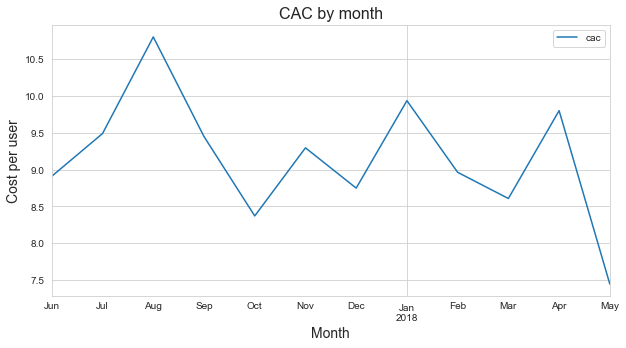

In [101]:
ltv_cohorts.groupby('first_order_month').agg({'cac':'first'}).plot(figsize = (10,5))
plt.title('CAC by month', fontsize = 16)
plt.ylabel('Cost per user', fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.show()

In [102]:
ltv_sources = ltv_sources.merge(
    costs.groupby(['month', 'source_id']).costs.sum().reset_index(), left_on = (['order_month', 'first_source_id']),
    right_on = (['month', 'source_id']), how = 'left')

In [103]:
ltv_sources.drop(columns = ['source_id', 'month'], inplace = True)
ltv_sources.rename(columns = {'costs':'total_costs'}, inplace = True)

ltv_sources['cac'] = ltv_sources['total_costs'] / ltv_sources['source_users']
ltv_sources.head()

,first_source_id,order_month,gross_profit,source_users,ltv,total_costs,cac
0,1.0,2017-06-01,1326.729980,2969,0.446861,1125.609985,0.379121
1,1.0,2017-07-01,1613.180054,2969,0.543341,1072.880005,0.361361
2,1.0,2017-08-01,1418.180054,2969,0.477663,951.809998,0.320583
3,1.0,2017-09-01,2869.189941,2969,0.966383,1502.010010,0.505898
4,1.0,2017-10-01,3534.070068,2969,1.190323,2315.750000,0.779976


In [104]:
cac_sources = ltv_sources.pivot_table(
    index = 'first_source_id',
    columns = 'order_month',
    values = 'cac',
    aggfunc = 'mean')

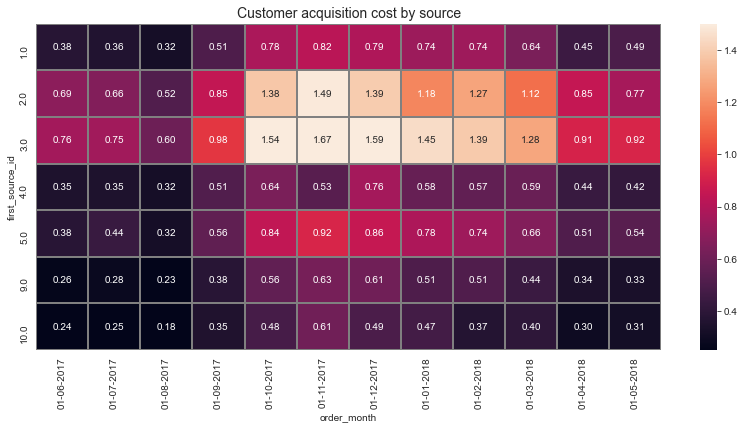

In [105]:
# plot a heatmap
plt.figure(figsize=(14, 6))
plt.title('Customer acquisition cost by source', fontsize = 14)
sns.heatmap(
    cac_sources, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='grey', 
    #cmap = 'BuPu',
    vmin = 0.25, vmax = 1.5
).set_xticklabels(cac_sources.columns.strftime('%d-%m-%Y'))
plt.show()

#### <font color = 'blue'>Notes:</font>
Monthly costs are highest on January and April.<br>
CAC by source is highest for sources 2 and 3, with sources 5 and 1 following.<br>


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


### How worthwhile were the investments? (ROI)

In [106]:
# return of marketing investment per cohort:
ltv_cohorts['romi'] = ltv_cohorts['ltv'] / ltv_cohorts['cac']

romi_cohorts = ltv_cohorts.pivot_table(
    index = 'first_order_month',
    columns = 'age_month',
    values = 'romi',
    aggfunc = 'mean')

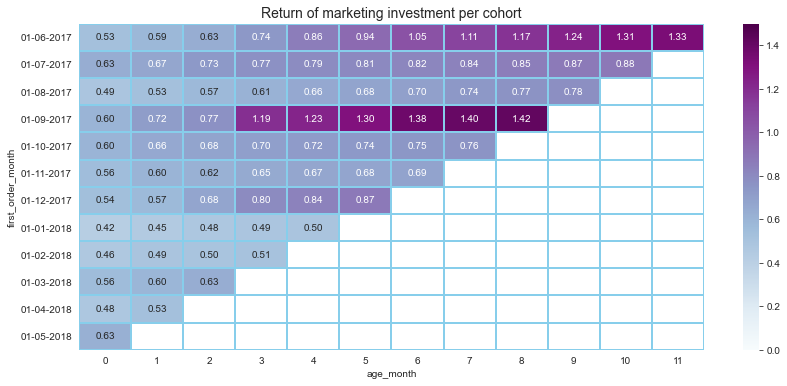

In [107]:
# plot a heatmap
plt.figure(figsize=(14, 6))
plt.title('Return of marketing investment per cohort', fontsize = 14)
sns.heatmap(
    romi_cohorts.cumsum(axis = 1), 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='skyblue', 
    cmap = 'BuPu',
    vmin = 0, vmax = 1.5
).set_yticklabels(romi_cohorts.index.strftime('%d-%m-%Y'))
plt.show()

In [108]:
# calculate average romi per source:
ltv_sources['romi'] = ltv_sources['ltv'] / ltv_sources['cac']

ltv_sources.head()

,first_source_id,order_month,gross_profit,source_users,ltv,total_costs,cac,romi
0,1.0,2017-06-01,1326.729980,2969,0.446861,1125.609985,0.379121,1.178676
1,1.0,2017-07-01,1613.180054,2969,0.543341,1072.880005,0.361361,1.503598
2,1.0,2017-08-01,1418.180054,2969,0.477663,951.809998,0.320583,1.489982
3,1.0,2017-09-01,2869.189941,2969,0.966383,1502.010010,0.505898,1.910234
4,1.0,2017-10-01,3534.070068,2969,1.190323,2315.750000,0.779976,1.526102


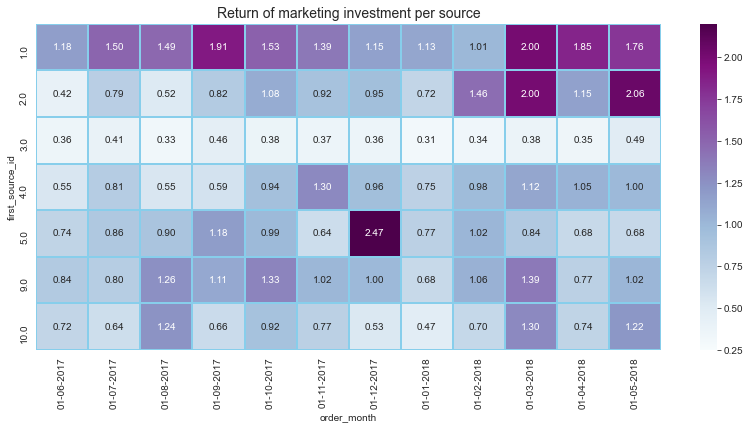

In [109]:
romi_source = ltv_sources.pivot_table(
    index = 'first_source_id',
    columns = 'order_month',
    values = 'romi',
    aggfunc = 'mean')

# plot a heatmap
plt.figure(figsize=(14, 6))
plt.title('Return of marketing investment per source', fontsize = 14)
sns.heatmap(
    romi_source, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='skyblue', 
    cmap = 'BuPu',
    vmin = 0.25, vmax = 2.2
).set_xticklabels(romi_source.columns.strftime('%d-%m-%Y'))
plt.show()

#### <font color = 'blue'>Notes:</font>
Highest ROMI is seen at cohorts 6.17 and 9.17, with cohorts 7.17 and 12.17 following.<br>
Sources with the best return of marketing investment are 1, 2 and 5.


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)


# Step 3. Write a conclusion: advise marketing experts how much money to invest and where.

## Project summary


In this project I checked different indicators and calculated metrics in order to evaluate effectiveness of marketing strategy in the reporting period. For this task I sorted data by different criteria: cohorts of users by date of their join, users whose first visit was from specific sources and users who started to use the service on different platforms. I looked both for overall data to check for total averages and for dynamics over period of time in order to track seasonal patterns. <br>

### Product


* **Unique Visitors**:<br>
    I sorted visits by day, week and month to check for daily, weekly and monthly amount of active users and also plotted graphs to track changes over period of time.
     * Average DAU: 907
     * Average WAU: 5796
     * Average MAU: 23228 <br>
     
 The daily and the weekly visitors graph indicate high peak near middle of November, which could be linked to seasonal sale like 11.11. Also those graphs indicate sudden drop in amount of visitors in the end of May which could appear due to some tecnical issues with the service.<br>
    Months with highest user activity are 10-12.17, with 1-3.18 following right after.<br>
    Sticky factor didn't provide any information because MAU and DAU values mostly correlated and their ratio remained uniform without any irregularities.
      

* **Visits**:<br>

    * Average number of daily sessions: 987
    * Daily sessions to DAU ratio: 1.09 <br>
    
 Most of the users visiting the service no more than once a day. Highest number of users visiting more than once is spotted on mid-November activity peak.<br>
 73.1% of daily sessions are made from desktop computers, compared to 26.9% visits from touch devices. It doesn't looks good, since most of the users usually prefer mobile browsing. Looks like the service is missing large segment of mobile device users which is yet to be attracted.
 

* **Session Lengths**:<br>

    * Average session length is 6 minutes.
    * Mobile device sessions are shorter than desktop ones (with average lengths of 4 and 7 minutes accordingly).
 The longest sessions were recorded around seasonal activity peak in November. The shortest sessions were around end of May, where also sudden drop in visitors and sessions was in place.
    

* **Retention**:<br>

    * Retention by cohorts: best retention over time is spotted for 6.17 cohort, while best retention in the first months belongs to 9.17 cohort. All cohorts had raise in retention rates in November.
    * Sources with highest retention rates are 9, 1 and 2. 
    * Retention rates for desktop users are better at any given month than for mobile users.

### Sales


* **Conversion**:

     * Average conversion rate is 1 day.
     * Vast majority of the buyers are making their first purchase very close to the first visit, though there are also some users who can make first purchase up to year from a first visit.
     * Conversion rates for desktop and touch devices are similar.
     * Shortest CR is for sources 4, 5 and 10. Longest CR is for source 9, despite it having the best retention rate.


* **Amount of orders**:

     * Average user makes 1.69 orders per month.
     * Cohort with highest amount of orders is 6.17.
     * Most of cohort's monthly average orders number rise in December 2017 and May 2018.
     * Most of the orders are made by desktop device users. 
     * Line graph of mobile device users is much flatter and less affected by seasonality. Looks like their decisions are less affected by seasonal actions and promotions. 
     * Sources with highest amount of orders are 2, 3 and 4.

* **Average purchase size**:

     * Average purchase size is 2.5.
     * Cohorts with highest purchase size are 8-9.17.
     * Average purchase size for desktop and touch platforms is almost similar.
     * Sources 1 and 2 have largest average purchase, with source 5 following them.
      
* **Lifetime value**:

     * While cohort 6.17 manages to retain high LTV rates over the time, cohort 9.17 has the largest monthly LTV value. Cohort 12.17 also is in the group with the highest LTV.
     * For some of the monthly cohorts LTV rates had rised significantly in February and March 2018.
     * Sources with highest LTV rates are 1, 2 and 5.
     * Desktop users mostly bring higher LTV than touch device users, in 1.18 even twice as high. In 11.17 (month with highest user activity) though touch users LTV was just a little higher than for desktop users.

### Marketing


* **Total costs**:

    * Monthly costs are higher than profits, though January, March and May profits peaks almost reach the costs graph.
    * Source 3 costs are the highest, more than twice as high as any other source's.
    * Sources 1, 2 and 5 are the only whose revenues higher than costs.


* **Customer acquisition cost**:

    * Highest overall CAC had been spotted in August, then in January and in April. 
    * Sources with highest CAC rates are 2 and 3.


* **Return of marketing investment**:

    * Cohort of users who joined on 9.17 is the most profitable one in terms of ROMI, with cohorts 6-7.17 and 12.17 following right after.
    * ROMI is highest for source 1, then for 2, 9 and 5.

## Conclusion


Overall costs are very high while profits are not high enough to cover them. <br>
Based on the above findings, I believe the best course is to do the following:
* Lower January marketing expenses; their timing fall on the drop in user activity and in seasonal sales decrease, thus bringing lowest return of investment. In terms of month I would pay more attention to June and September, because users attracted in those months was most active in the course of the year, make many purchases, have higher than average purchase sum and great LTV and ROMI rates.
* Highest user activity is deteced on period just before the winter holidays. However, even in this period expenses are higher than income, and they should be optimized.
* Source number three has very high costs compared to income, which leads to relatively low return of investment. While bringing a lot of customers (source 3 leads by amount of customers overall) and being second rated by number of purchases, average purchase amount for this source is smaller than total average and LTV is accordingly low. I believe that same amounts invested in other sources could return better profits.
* Sources 1 and 2, while having relatively small customers share (7% and 12% accordingly), are bringing the best profits. Average revenue per sale from those customer is the highest one (2.9, compared to 2.3 at source 3), so their LTV and ROMI are accordingly high. I would advice to consider to pay more attention to those sources. 
* Source 5 is the last one where profits are higher than costs. While marketing investments in this source bring less revenue per customer than with sources 1 and 2, it still brings revenue and not losses, so I see it as another potential source of higher profits.
* Source 7 has excellent - better than at any other - values almost on all 'per customer' metrics, but I have relatively little data on this source (0.01% of the whole dataset) and don't find it trustworthy enough.
* Also I would like to point at low user activity on touch devices. They have too little visits, those visits are shorter and retention rates are also worse. Amount of orders graph shows that those user's buying behavior is much less affected by seasonality (and by seasonal investments in marketing, accordingly). Since most of the users, by any reliable survey, prefer to use mobile devices over desktop, it is obvious that the service is overlooking large segment of users and the profits they could bring.


 [Return to table of contents ^^^](#Business-Analysis-for-Yandex.Afisha-project)
